# Custom Torch Dataset for HECKTOR
I have created custom torch Dataset to provide 2D slices and labels during training.

In [1]:
from hecktor_survival.dataset.dataset import HECKTOR_Dataset
from hecktor_survival.dataset.augmentation import PairedRandom2DTransform


import matplotlib.pyplot as plt
from typing import Dict, Any
import seaborn as sns
import torch

Instantiating a dataset object. It requires providing:
* **data_path** -> Path data directory
* **bbox_or_centroid** -> Whether utilize data from bbox or centroid base preprocessing.
* **fold** -> Which fold to use.
* **mode** -> Whether train, val or test mode.
* **modality** -> Whether return CT, PET or Merged images.
* **normalize** -> Whether perform normalization.
* **transforms_img** -> Optional 2D transforms for images.
* **transforms_mask** -> Optional 2D transforms for corresponding masks.

In [2]:
def visualize_image_data(sample: Dict[str, Any]):
    fig, axs = plt.subplots(1,3, figsize=(12,5))

    # 1) 2D slice
    axs[0].imshow(sample["crops"][0].numpy(), cmap="gray")
    axs[0].set_title("2D image slice")

    # 2) Corresponding mask
    axs[1].imshow(sample["mask"].squeeze().numpy(), cmap="Reds")
    axs[1].set_title("2D GT mask")

    # 3 Overlay
    axs[2].imshow(sample["crops"][0].numpy(), cmap="gray")
    axs[2].imshow(sample["mask"].squeeze().numpy(), alpha=0.5, cmap="Reds")
    axs[2].set_title("2D image overlayed with a mask")
    plt.show()


def visualize_cancer_area(dataset: torch.utils.data.Dataset):
    cancer_areas = []
    for i in range(len(dataset)):
        cancer_areas.append(dataset[i]["cancer_area"])
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.histplot(cancer_areas,
                kde=True,
                bins=18,
                stat="percent",
                ax=ax)
    plt.suptitle("Histogram of cancer area values")
    plt.show()

## Dataset with BBOX crops
Below I instantiate exemplary dataset with crops based on BBOX preprocessing.

In [3]:
# Dataset with BBOX crops. 

img_transforms = PairedRandom2DTransform(image_size=(224, 224))

ds_bbox = HECKTOR_Dataset(
    data_path = "/home/jakub/research/HECKTOR/Data",
    bbox_or_centroid = "bbox",
    fold = 1,
    mode = 'train',
    modality = 'PET',
    normalize_imgs = True,
    normalize_targets = False,
    transforms = None,
    slice_strategy = "random",
    seed = None
)

In [4]:
sample = ds_bbox[1]

print("pid -> Patient ID")
print(sample['pid'])

print("***")
print("crops -> Tensor with a 2D slice")
print(sample['crops'].shape)

print("***")
print("mask -> Tensor with a 2D mask")
print(sample['mask'].shape)

print("***")
print("labels -> Tensor with RFS and censoring status")
print(sample['labels'])

print("***")
print("cancer area -> Percent of an image area considered as cancer region")
print(sample["cancer_area"])

pid -> Patient ID
CHUM-002
***
crops -> Tensor with a 2D slice
torch.Size([3, 224, 224])
***
mask -> Tensor with a 2D mask
torch.Size([1, 224, 224])
***
labels -> Tensor with RFS and censoring status
tensor([439.,   1.])
***
cancer area -> Percent of an image area considered as cancer region
0.10072544642857142


In [5]:
img, mask = img_transforms({'CT': sample["crops"]}, sample["mask"])

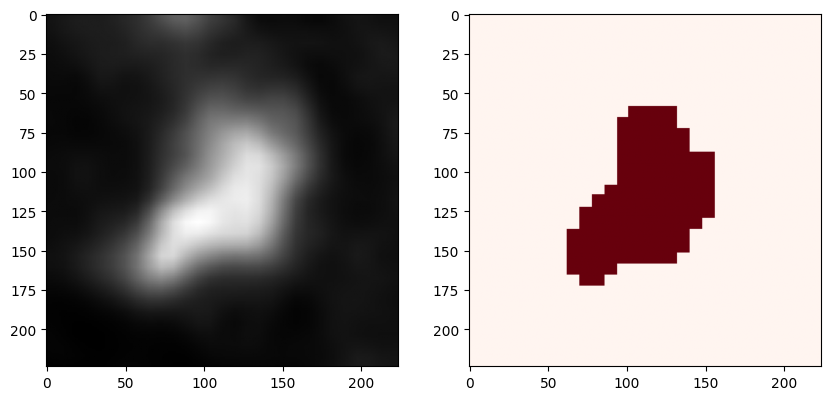

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img["CT"][0].numpy(), cmap="gray")
axs[1].imshow(mask[0].numpy(), cmap="Reds")

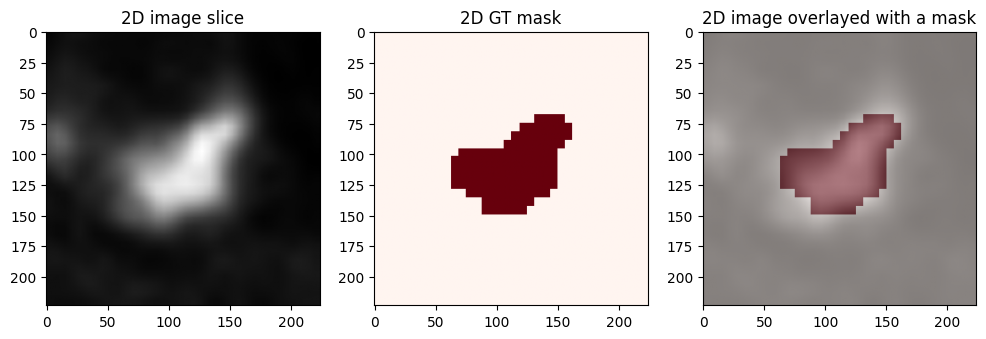

In [7]:
visualize_image_data(sample)

In [ ]:
visualize_cancer_area(dataset=ds_bbox)

## Dataset with Centroid crops
Below I instantiate exemplary dataset with crops based on centroid preprocessing.

In [ ]:
# Dataset with centroid crops. 

ds_centroid = HECKTOR_Dataset(
    data_path = "/home/jakub/research/HECKTOR/Data",
    bbox_or_centroid = "centroid",
    fold = 1,
    mode = 'train',
    modality = 'CT',
    normalize_imgs = True,
    normalize_targets = True,
    transforms = None,
    slice_strategy = 'random',
    seed = None
)

In [ ]:
sample = ds_centroid[0]

print("pid -> Patient ID")
print(sample['pid'])

print("***")
print("crops -> Tensor with a 2D slice")
print(sample['crops'].shape)

print("***")
print("mask -> Tensor with a 2D mask")
print(sample['mask'].shape)

print("***")
print("labels -> Tensor with RFS and censoring status")
print(sample['labels'])

print("***")
print("cancer area -> Percent of an image area considered as cancer region")
print(sample["cancer_area"])

In [ ]:
visualize_image_data(sample)

In [ ]:
visualize_cancer_area(dataset=ds_centroid)